In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mpl_toolkits import mplot3d


In [3]:
%matplotlib inline  

In [4]:
def find_num_right(f, labels):
    num_right = 0
    looking = f - labels
    for i in range(len(f)):
        if abs(looking[i]) == 0:
            num_right += 1
    return num_right / len(f)

In [98]:
print(sum(faces[0,:]))
# face = np.reshape(faces[0,:],(168,192)).T
# img = plt.imshow(face)
# img.set_cmap('gray')
# plt.axis('off')
# plt.show()
# print(sum(faces[3,:]))
# face = np.reshape(faces[3,:],(168,192)).T
# img = plt.imshow(face)
# img.set_cmap('gray')
# plt.axis('off')
# plt.show()

print(np.mean(faces[0,:]))
print(np.mean(faces)*2432)

print(faces.shape)
print((sum(sum(faces))/(2432)))

3696259
114.59136284722223
167925.93198164683
(2432, 32256)
1690.361019736842


C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563
C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563\CroppedYale
(2432, 32256)
(2432,)


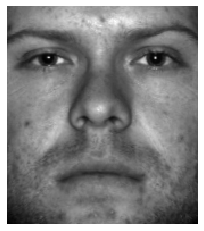

512
(2432, 32256)
(32256, 2432)


In [99]:

script_dir = os.path.dirname(os.path.realpath('__file__')) #<-- absolute dir the script is in
print(script_dir)
rel_path = "CroppedYale"
abs_file_path = os.path.join(script_dir, rel_path)

print(abs_file_path)
faces = []
labels = []
female_faces = []
male_faces = []
labels_all = []
this_one = -1
dark_label = []

for fname in os.listdir(abs_file_path):
    this_one+= 1
    if fname in ['yaleB05', 'yaleB15', 'yaleB22', 'yaleB27', 'yaleB28', 'yaleB32', 'yaleB34', 'yaleB37']:
        female = True
    else:
        female = False
    for fname2 in os.listdir(os.path.join(script_dir, rel_path, fname)):
        img = np.array(Image.open(os.path.join(script_dir, rel_path, fname, fname2)))
        faces.append((img.T).reshape(192*168))
        if np.mean(img)> 114:
            dark_label.append(1)
        else:
            dark_label.append(0)
        if (female):
            labels.append(1)
            female_faces.append((img.T).reshape(192*168))
        else:
            labels.append(0)
            male_faces.append((img.T).reshape(192*168))
        labels_all.append(this_one)

        
        
# print(np.array(cropped_faces).shape)
faces = np.array(faces)
labels = np.array(labels)
print(faces.shape)
print(labels.shape)
# print(cropped_faces.shape)



face = np.reshape(faces[0,:],(168,192)).T
img = plt.imshow(face)
img.set_cmap('gray')
plt.axis('off')
plt.show()

#break up a testing and training set
x_train,x_test,y_train,y_test=train_test_split(faces,labels,test_size=0.2)

n_female = len(female_faces)
print(n_female)
faces_sorted = np.array(np.concatenate((female_faces, male_faces))).T
print(faces.shape)
print(faces_sorted.shape)
# print(faces.shape)

In [103]:
#using kmeans in unsupervized 
kmeans = KMeans(n_clusters=2, random_state=0).fit(faces)
kmeans_predict_two = kmeans.predict(faces)

In [182]:
print(find_num_right(kmeans_predict_two, dark_label))
print(n_female/len(faces))

0.4753289473684211
0.21052631578947367


Text(0.5, 1.0, '2-means grouping by person and picture number')

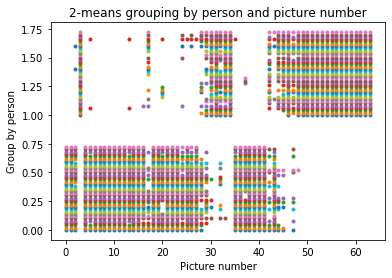

In [179]:

for i in range(max(labels_all)):
    start = labels_all.index(i)
    end = labels_all.index(i+1)
    plt.plot(kmeans_predict_two[start:end]+0.02*i, '.')
plt.xlabel("Picture number")
plt.ylabel("Group by person")
plt.title("2-means grouping by person and picture number")

In [133]:
#using kmeans in unsupervized 
kmeans = KMeans(n_clusters=3, random_state=0).fit(faces)
kmeans_predict_three = kmeans.predict(faces)

Text(0.5, 1.0, '3-means grouping by person and picture number')

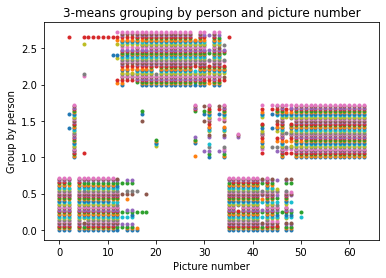

In [181]:
for i in range(max(labels_all)):
    start = labels_all.index(i)
    end = labels_all.index(i+1)
    plt.plot(kmeans_predict_three[start:end]+0.02*i, '.')
plt.xlabel("Picture number")
plt.ylabel("Group by person")
plt.title("3-means grouping by person and picture number")

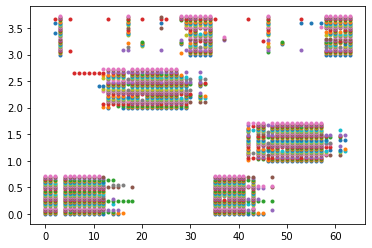

In [25]:
#using kmeans in unsupervized 
kmeans = KMeans(n_clusters=4, random_state=0).fit(faces)
max_f = kmeans.predict(faces)
for i in range(max(labels_all)):
    start = labels_all.index(i)
    end = labels_all.index(i+1)
    plt.plot(max_f[start:end]+0.02*i, '.')

In [71]:
#mixute models
u,s,vT = np.linalg.svd(faces_sorted-np.mean(faces_sorted))
v = vT.T

-25903.962840250413


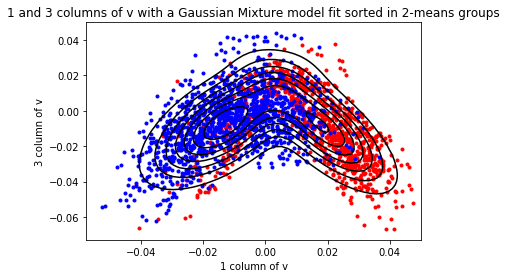

In [176]:
first = 1
second =3
people = v[:,(first, second)]
GMModel = GaussianMixture(n_components=2).fit(people)
AIC = GMModel.aic(people)
print(AIC)

# inds = np.array(kmeans_predict_three).argsort()
# kmeans_predict_three_sorted = np.array(kmeans_predict_three)[inds]

inds = np.array(kmeans_predict_two).argsort()
kmeans_predict_two_sorted = np.array(kmeans_predict_two)[inds]

v_sorted = np.array(v)[inds]
# print(v_sorted)
switch = kmeans_predict_two_sorted.tolist().index(1)
# switch1 = kmeans_predict_three_sorted.tolist().index(1)
# switch2 = kmeans_predict_three_sorted.tolist().index(2)
# female = np.array(v)[np.array(y_train)]# np.array([x for v, y in zip(v, y_train) if y == 1])
# print(female.shape)

# plt.plot(v_sorted[switch1:,first],v_sorted[switch1:,second],'r.', zorder = 1)#,MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
# plt.plot(v_sorted[switch1:switch2,first],v_sorted[switch1:switch2,second],'b.', zorder = 2)#,MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)
# plt.plot(v_sorted[:switch2,first],v_sorted[:switch2,second],'g.', zorder = 2)
plt.plot(v_sorted[switch:,first],v_sorted[switch:,second],'r.', zorder = 1)#,MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
plt.plot(v_sorted[:switch,first],v_sorted[:switch,second],'b.', zorder = 2)#,MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)

x = np.linspace(-0.05, 0.05)
y = np.linspace(-0.05, 0.05)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

plt.xlabel(str(first) + ' column of v')
plt.ylabel(str(second) + ' column of v')
plt.title(str(first ) + " and " +str(second) + " columns of v with a Gaussian Mixture model fit sorted in 2-means groups")

CS = plt.contour(X, Y, Z,colors='k',linestyles='solid', zorder = 3)

plt.show()

In [30]:
#mixute models
u,s,vT = np.linalg.svd(faces-np.mean(faces),full_matrices=0)
v = vT.T

(32256, 2432)
-1


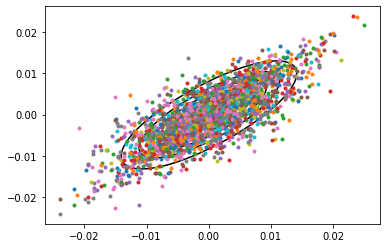

In [58]:
dogcat = vT[:,(0,1)]
GMModel = GaussianMixture(n_components=2).fit(dogcat)
AIC = GMModel.aic(dogcat)
print(v.shape)
# female = np.array(v)[np.array(y_train)]# np.array([x for v, y in zip(v, y_train) if y == 1])
# print(female.shape)
zero = labels_all.index(0)
one = labels_all.index(1)
two = labels_all.index(2)
# plt.plot(v[zero:one, 0],v[zero:one,1],'r.', zorder = 2)#,MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
# plt.plot(v[one:two, 0],v[one:two,1],'g.', zorder = 3)#,MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
# plt.plot(v[two:,0],v[two:,1],'b.', zorder = 1)#,MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)
# plt.plot(v[:,0],v[:,1],'.')
for i in range(max(labels_all)+1):
    start = labels_all.index(i)
    try:
        end = labels_all.index(i+1)
    except:
        end = -1
#     print("start = ", start)
#     print("end = ", end)
#     print(v.shape)
    plt.plot(vT[start:end,0],vT[start:end,1], '.')
print(end)

x = np.linspace(-0.02, 0.02)
y = np.linspace(-0.02, 0.02)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z,colors='k',linestyles='solid')

plt.show()

In [163]:
f = GMModel.fit_predict(x_train)
print(f)

MemoryError: 